# BL40A2010 Introduction to IoT-Based Systems

## Tutorial 2: *Information* from data

## Author: Pedro Nardelli

In [1]:
#Import libraries
import pandas as pd #https://pandas.pydata.org/
import matplotlib.pyplot as plt #https://matplotlib.org/
import matplotlib.dates as mdates #https://matplotlib.org/

### Uploading datasets from wind speed in Lappeenranta - Lepola station

In [2]:
#http://en.ilmatieteenlaitos.fi/download-observations#!/
#Note parse_dates to combine the 5 first columns, also note that the separator from 
#decimal is "." and data separator is ","

speed_20180118 = pd.read_csv("wind-20180118.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
                          
speed_20180118.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2018-01-18 00:00:00 to 2018-01-19 00:00:00
Data columns (total 1 columns):
Wind speed (m/s)    145 non-null float64
dtypes: float64(1)
memory usage: 2.3 KB


In [3]:
speed_20180320 = pd.read_csv("wind-20180320.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
                          
speed_20180320.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2018-03-20 00:00:00 to 2018-03-21 00:00:00
Data columns (total 1 columns):
Wind speed (m/s)    142 non-null float64
dtypes: float64(1)
memory usage: 2.3 KB


In [4]:
speed_20180729 = pd.read_csv("wind-20180729.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0, 
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])
                          
speed_20180729.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2018-07-29 00:00:00 to 2018-07-30 00:00:00
Data columns (total 1 columns):
Wind speed (m/s)    144 non-null float64
dtypes: float64(1)
memory usage: 2.3 KB


### Ploting each day

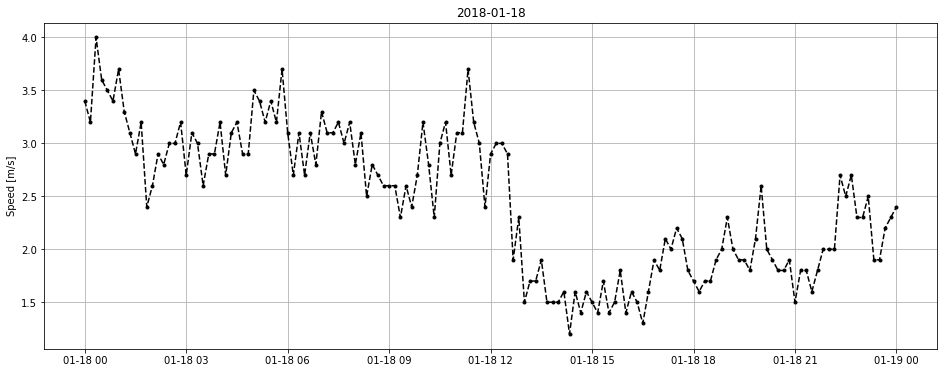

In [5]:
#Day1
day1 = '2018-01-18'
plt.figure(figsize=(16,6)) 
plt.plot(speed_20180118,color='black', marker='.',linestyle='--') 
plt.title(day1) 
plt.ylabel("Speed [m/s]") 
plt.grid(True) 
plt.show() 

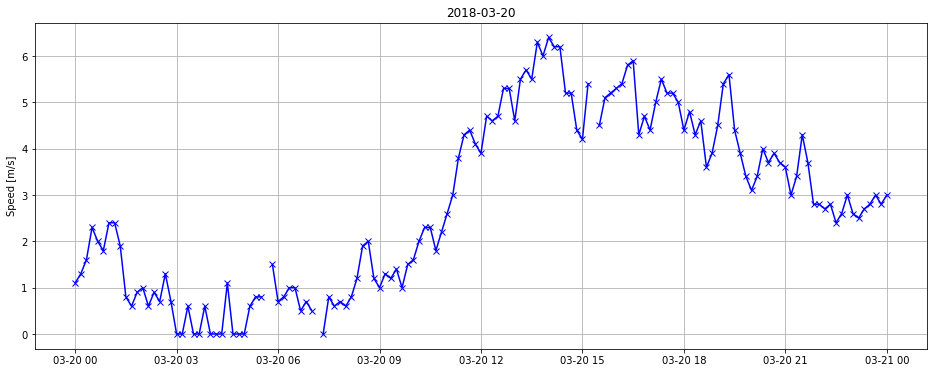

In [6]:
#Day2
day2 = '2018-03-20'
plt.figure(figsize=(16,6)) 
plt.plot(speed_20180320, color='blue', marker='x',linestyle='-') 
plt.title(day2) 
plt.ylabel("Speed [m/s]") 
plt.grid(True) 
plt.show() 

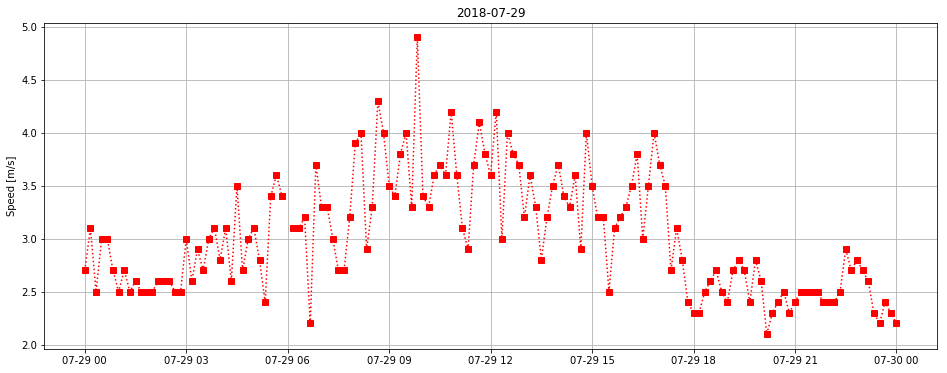

In [7]:
#Day3
day3 = '2018-07-29'
plt.figure(figsize=(16,6)) 
plt.plot(speed_20180729,color='red', marker='s',linestyle=':') 
plt.title(day3) 
plt.ylabel("Speed [m/s]") 
plt.grid(True) 
plt.show() 

### Three together with improved visualization

In [8]:
#Difference
delta1 = speed_20180118.index[0].date() - speed_20180320.index[0].date()
#
delta2 = speed_20180118.index[0].date() - speed_20180729.index[0].date()

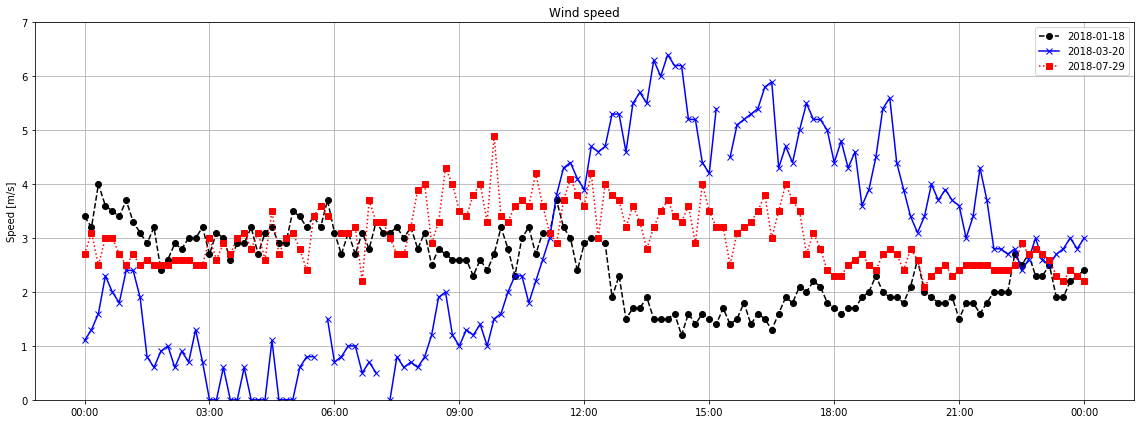

In [9]:
fig, ax = plt.subplots(1,figsize=(16,6))
#
plt.plot(speed_20180118.index, speed_20180118.values, label=day1, color='black', 
         marker='o',linestyle='--')
#
plt.plot(speed_20180320.index + pd.offsets.Day(delta1.days), 
         speed_20180320.values, label=day2, color='blue', marker='x',linestyle='-')
#
plt.plot(speed_20180729.index + pd.offsets.Day(delta2.days), 
         speed_20180729.values, label=day3, color='red', marker='s',linestyle=':')
#
plt.legend()
plt.ylim([0, 7])
plt.title("Wind speed") 
plt.ylabel("Speed [m/s]") 
plt.grid(True)
plt.tight_layout()
#change x ticks
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show() 

### What these data may tell about wind generation?

Let's check [LUT data from its turbine](https://www.lut.fi/green-campus/alykas-sahkoverkko-smart-grid/tuotantolukemia).

![20180118](https://forms.lut.fi/Green_Campus_data/wind_turbine/daily/2018/01-18.svg)

![20180320](https://forms.lut.fi/Green_Campus_data/wind_turbine/daily/2018/03-20.svg)

![20180729](https://forms.lut.fi/Green_Campus_data/wind_turbine/daily/2018/07-29.svg)

### Does these data provide any *information*?

Let's take 29.07.2018. [We know that the power converted by the turbine is propotional to the speed of power of three.](https://www.raeng.org.uk/publications/other/23-wind-turbine) Mathematically:

$$P = \dfrac{1}{2} \rho A  v^3 C_p $$,

where $P$ in watts is the converted power, $\rho = 1.23$ \[ kg/m$^2$\] is the air density, $A$ is the swept area, $v$ the wind speed and $C_p$ is the power coeficient. 

- $\rho$ is constant and $C_p$ is a value between 0.4 and 0.5.
- $A = \pi r^2$ where $r$ is the blade length. The LUT one is around 6 meters. 

Then: $P_\mathrm{LUT} \approx 0.5 * 1.23 * \pi * 6^2  v^3 * 0.5 \approx 32 v^3$ watts.

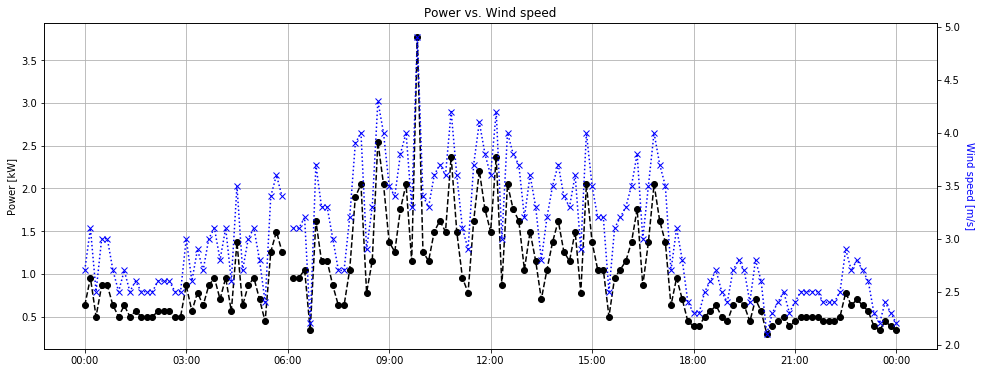

In [10]:
#subplot function
#https://matplotlib.org/2.0.1/examples/api/two_scales.html
####
fig, ax1 = plt.subplots(figsize=(16,6))
#left axis
ax1.set_ylabel("Power [kW]", color='black')
ax1.plot( 0.032*(speed_20180729)**3,color='black', marker='o',linestyle='--') 
#right axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel("Wind speed [m/s]", color='blue',rotation=270,va="bottom")  
ax2.plot(speed_20180729,color='blue', marker='x',linestyle=':')
#
ax1.grid(True)
plt.title("Power vs. Wind speed") #title     
xfmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)
#
plt.show()

We can now check this with the actual data. Remember that we have a very very basic estimation of wind speed since the measurement station is not in the same place as the turbine and its parameters are a rough guess.

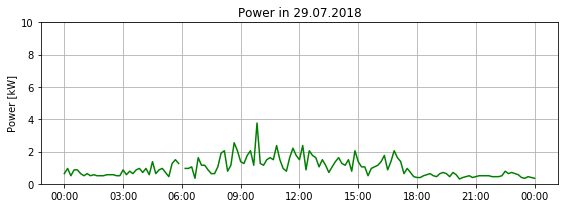

In [11]:
fig, ax = plt.subplots(1,figsize=(8,3))
#
plt.plot(0.032*(speed_20180729)**3,  color='green', marker='',linestyle='-')
#
plt.ylim([0, 10])
plt.title("Power in 29.07.2018") 
plt.ylabel("Power [kW]") 
plt.grid(True)
plt.tight_layout()
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show() 

<img align="left" src="https://forms.lut.fi/Green_Campus_data/wind_turbine/daily/2018/07-29.svg">

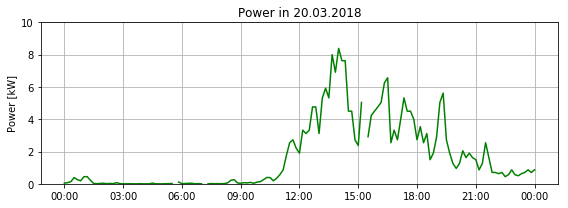

In [12]:
fig, ax = plt.subplots(1,figsize=(8,3))
#
plt.plot(0.032*(speed_20180320)**3,  color='green', marker='',linestyle='-')
#
plt.ylim([0, 10])
plt.title("Power in 20.03.2018") 
plt.ylabel("Power [kW]") 
plt.grid(True)
plt.tight_layout()
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show() 

<img align="left" src="https://forms.lut.fi/Green_Campus_data/wind_turbine/daily/2018/03-20.svg">

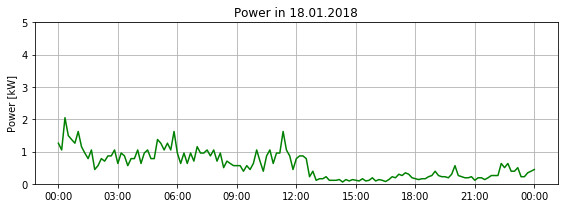

In [13]:
fig, ax = plt.subplots(1,figsize=(8,3))
#
plt.plot(0.032*(speed_20180118)**3,  color='green', marker='',linestyle='-')
#
plt.ylim([0, 5])
plt.title("Power in 18.01.2018") 
plt.ylabel("Power [kW]") 
plt.grid(True)
plt.tight_layout()
#change x ticks
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
#
plt.show() 

<img align="left" src="https://forms.lut.fi/Green_Campus_data/wind_turbine/daily/2018/01-18.svg">

## Even under these strong assumption we can get some indirect information from wind speed to power production!